We will built several linear regression examples. We will download the data and visualize the plots.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels import regression
import math
plt.style.use('fivethirtyeight')

In [2]:
def linreg(X,Y,asset,benchmark):
    
    X = sm.add_constant(X)
    model = regression.linear_model.OLS(Y,X).fit()
    a = model.params[0]
    b = model.params[1]
    
    X = X[:,1]
    
    X2 = np.linspace(X.min(), X.max(), 100)
    Y_hat = X2 * b + a
    plt.scatter(X, Y, alpha=0.3) # Plot the raw data
    plt.plot(X2, Y_hat, 'r', alpha=0.9);  # Add the regression line, colored in red
    plt.xlabel(asset)
    plt.ylabel(benchmark)
    
    return model.summary()

In [3]:
import pandas_datareader as web

In [4]:
asset = web.get_data_yahoo("TSLA", "2017-1-1")
benchmark = web.get_data_yahoo("QQQ", "2017-1-1")


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     146.8
Date:                Fri, 24 Jan 2020   Prob (F-statistic):           4.92e-31
Time:                        15:20:43   Log-Likelihood:                 1651.8
No. Observations:                 769   AIC:                            -3300.
Df Residuals:                     767   BIC:                            -3290.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.001      0.658      0.511      -0.001       0.003
x1             1.1445      0.094     12.115      0.000       0.959       1.330
==============================================================================
Omnibus:                      137.402   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1376.645
Skew:                           0.467   Prob(JB):                    1.16e-299
Kurtosis:                       9.488   Cond. No.                         92.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

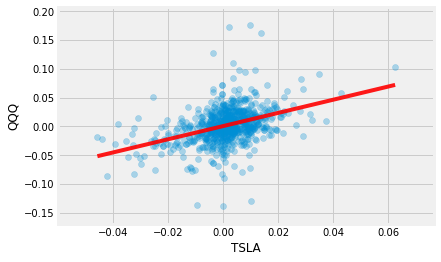

In [5]:
r_a = asset['Adj Close'].pct_change()[1:]
r_b = benchmark['Adj Close'].pct_change()[1:]

linreg(r_b.values, r_a.values, 'TSLA', 'QQQ')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.3245
Date:                Fri, 24 Jan 2020   Prob (F-statistic):              0.570
Time:                        15:20:43   Log-Likelihood:                -7.6769
No. Observations:                 100   AIC:                             19.35
Df Residuals:                      98   BIC:                             24.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4791      0.052      9.291      0.000       0.377       0.581
x1            -0.0502      0.088     -0.570      0.570      -0.225       0.125
==============================================================================
Omnibus:                       11.415   Durbin-Watson:                   1.771
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                3.828
Skew:                           0.056   Prob(JB):                        0.148
Kurtosis:                       2.048   Cond. No.                         4.25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

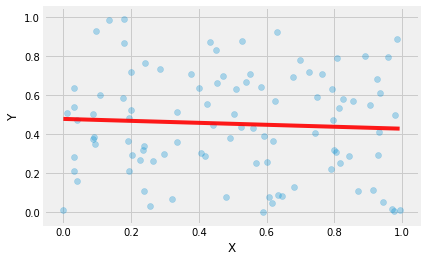

In [6]:
X = np.random.rand(100)
Y = np.random.rand(100)
linreg(X, Y,'X','Y')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     190.7
Date:                Fri, 24 Jan 2020   Prob (F-statistic):           1.01e-24
Time:                        15:20:43   Log-Likelihood:                 12.182
No. Observations:                 100   AIC:                            -20.36
Df Residuals:                      98   BIC:                            -15.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0044      0.042     -0.103      0.918      -0.088       0.080
x1             0.9973      0.072     13.808      0.000       0.854       1.141
==============================================================================
Omnibus:                        0.429   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.807   Jarque-Bera (JB):                0.131
Skew:                          -0.057   Prob(JB):                        0.936
Kurtosis:                       3.137   Cond. No.                         4.25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

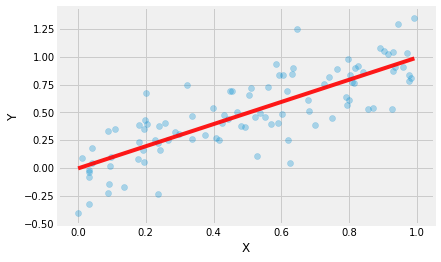

In [7]:
# Generate ys correlated with xs by adding normally-destributed errors
Y = X + 0.2*np.random.randn(100)

linreg(X,Y, 'X', 'Y')